## How to Run the cluster.py file

In [1]:
from cluster import preprocessed_df, reduce_dimensions, dbscan, show_prediction, get_precision
from retrieval import retrivalModel, binary_precision

In [24]:
model = retrivalModel('data/full_final_layer_lda.csv', changeParams = [2, 8, 2, 0, 8, 1, 1, .8, .8, 1]) # set to None if 
model.addFeature(("lyrics_clean", 1), "text")
model.createInverseIndex()

In [51]:
#get random song
import random
num = random.randint(0,len(model.df.index)-1)
song = model.getSource().iloc[num]

In [52]:
#Song query
query = model.query(song)

In [53]:
#Get song rows
rows = [num]
for post in query:
    rows.append(post.docid)
print(rows)

[3008, 2445, 2214, 2265, 3008, 1402, 828, 2861, 2978, 7, 2357, 2761, 2911, 1516, 3230, 2785, 631, 2575, 1642, 2663, 1748]


In [54]:
# process the dataframe
df = preprocessed_df()
song_lbls = ['title', 'artist', 'lastfm_id', 'genius_id']
features = [x for x in list(df.columns.values) if x not in song_lbls]

# grab the recommendation rows only and embedding + genius features
df = df.loc[rows, features]

In [55]:
# reduce the dimensions for clustering
umap, embeddings_reduced = reduce_dimensions(df)

In [56]:
# cluster
clusters = dbscan(embeddings_reduced)

In [57]:
precision = get_precision(clusters)
print(precision)

0.5


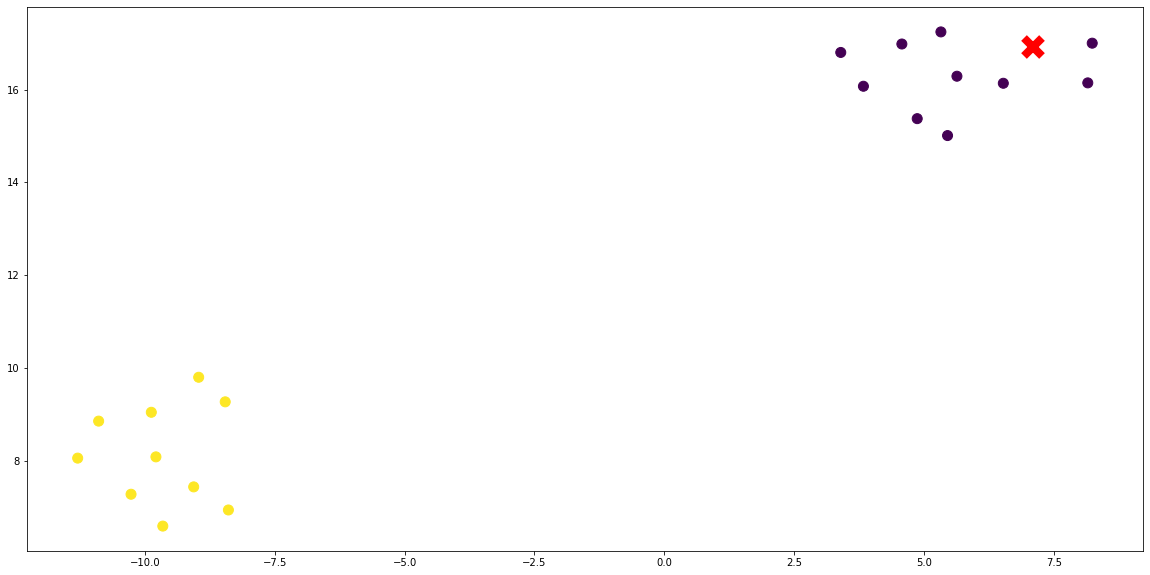

In [58]:
show_prediction(df, clusters)

In [49]:
def precision(runs, model):
    result = 0
    for _ in range(runs):
        #get random song
        num = random.randint(0,len(model.df.index)-1)
        song = model.getSource().iloc[num]
        #Song query
        query = model.query(song)
        #Get song rows
        rows = [num]
        for post in query:
            rows.append(post.docid)
        # process the dataframe
        df = preprocessed_df()
        song_lbls = ['title', 'artist', 'lastfm_id', 'genius_id']
        features = [x for x in list(df.columns.values) if x not in song_lbls]

        # grab the recommendation rows only and embedding + genius features
        df = df.loc[rows, features]
        # reduce the dimensions for clustering
        umap, embeddings_reduced = reduce_dimensions(df)
        # cluster
        clusters = dbscan(embeddings_reduced)
        precision = get_precision(clusters)
        result += precision
        #print("Song #{}, precision of {}".format(num, precision))
    return result/runs

In [50]:
result = []
for i in range(1,41):
    model.changeParams[9] = i/17
    ps = precision(30, model)
    print(ps)
    result.append(ps)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (36,) and (15,)

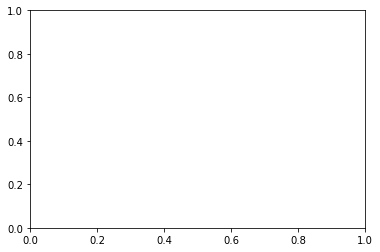

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0,36), result,'b-', label='bertStrength')

In [14]:
result


[0.4,
 0.4633333333333333,
 0.49166666666666664,
 0.4133333333333334,
 0.44,
 0.4033333333333333,
 0.3949999999999999,
 0.4299999999999999,
 0.4399999999999999,
 0.33,
 0.37833333333333335,
 0.4149999999999999,
 0.41333333333333333,
 0.5283333333333333,
 0.3645238095238096]

In [15]:
model1 = retrivalModel('data/full_final_layer_lda.csv', changeParams = [2, 8, 2, 0, 8, 0, 1, .8, .8, 1]) # set to None if 
model1.addFeature(("lyrics_clean", 1), "text")
model1.createInverseIndex()

model2 = retrivalModel('data/full_final_layer_lda.csv', changeParams = [2, 8, 2, 0, 8, 1, 1, .8, .8, 1]) # set to None if 
model2.addFeature(("lyrics_clean", 1), "text")
model2.createInverseIndex()



In [16]:
result1 = []
result2 = []
for i in range(100):
    ps1, ps2 = binary_precision(10, model1, model2)
    result1.append(ps1)
    result2.append(ps2)

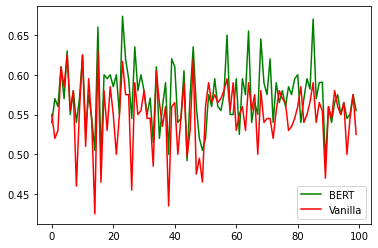

In [19]:
color = 'green'
plt.plot(range(100), result1, color=color)
color = 'red'
plt.plot(range(100), result2, color=color)
plt.legend(["BERT", "Vanilla"])

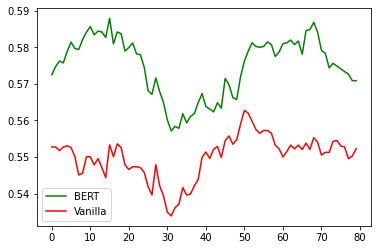

In [23]:
import numpy as np
avgResultMax1 = []
for i in range(len(result1)-20):
    avgResultMax1.append(np.mean(result1[i:i+20]))
avgResultMax2 = []
for i in range(len(result2)-20):
    avgResultMax2.append(np.mean(result2[i:i+20]))

color = 'green'
plt.plot(range(80), avgResultMax1, color=color)
color = 'red'
plt.plot(range(80), avgResultMax2, color=color)
plt.legend(["BERT", "Vanilla"])